<a href="https://www.kaggle.com/code/olamidemuhd/2023-fifa-world-cup-analysis?scriptVersionId=117548499" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fifa-world-cup-attendance-19302022/FIFA World Cup Award.csv
/kaggle/input/fifa-world-cup-attendance-19302022/FIFA World Cup Attendance.csv
/kaggle/input/fifa-world-cup-attendance-19302022/List of FIFA World Cup finals.csv
/kaggle/input/fifa-world-cup-attendance-19302022/Teams reaching the top four.csv


In [2]:
import matplotlib.pyplot as plt
from PIL import  Image
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")


In [3]:
import io
import base64
from matplotlib import rc,animation
from mpl_toolkits.mplot3d import Axes3D

<h2>FIFA World Cup</h2>

<b>The FIFA World Cup</b>, often simply called the World Cup, is an international association football competition contested by the senior men's national teams of the members of the Federation International Football Association (FIFA), the sport's global governing body.<br> The tournament has been held every four years since the inaugural tournament in 1930, except in 1942 and 1946 when it was not held because of the Second World War.<br> The reigning champions are Argentina, who won their third title at the 2022 tournament, in Qatar.


<h2>Data Collection World Cup Attendance Dataset</h2>

In [4]:
df = pd.read_csv("../input/fifa-world-cup-attendance-19302022/FIFA World Cup Attendance.csv")
df.head()

,Unnamed: 0,Year,Hosts,Total_Attendance,Matches,Average_Attendance,Number,Venue,Game(s)
0,0,1930,Uruguay,590549,18,32808,93000,"Estadio Centenario, Montevideo","Uruguay 6–1 Yugoslavia, Semi-final"
1,1,1934,Italy,363000,17,21353,55000,"Stadio Nazionale PNF, Rome","Italy 2–1 Czechoslovakia, Final"
2,2,1938,France,375700,18,20872,58455,"Olympique de Colombes, Paris","France 1–3 Italy, Quarter-final"
3,3,1950,Brazil,1045246,22,47511,"173,850[86]","Maracanã Stadium, Rio de Janeiro","Brazil 1–2 Uruguay, Deciding match"
4,4,1954,Switzerland,768607,26,29562,63000,"Wankdorf Stadium, Bern","West Germany 3–2 Hungary, Final"


</br>

In [5]:
df.tail()

,Unnamed: 0,Year,Hosts,Total_Attendance,Matches,Average_Attendance,Number,Venue,Game(s)
18,18,2010,South Africa,3178856,64,49670,84490,"Soccer City, Johannesburg","Spain 1–0 Netherlands, Final"
19,19,2014,Brazil,3429873,64,53592,74738,"Maracanã Stadium, Rio de Janeiro","Germany 1–0 Argentina, Final"
20,20,2018,Russia,3031768,64,47371,78011,"Luzhniki Stadium, Moscow","France 4–2 Croatia, Final"
21,21,2022,Qatar,3404252,64,53191,88966,"Lusail Stadium, Qatar","Argentina 3–3 (4–2p) France, Final"
22,22,Overall,Overall,43936730,964,45036,"173,850[86]","Maracanã Stadium, Rio de Janeiro (1950)",NaN


In [6]:
#changing year data type and droping overall count row
df.drop(df.tail(1).index,inplace=True) # drop last n rows
df['Year'] = df['Year'].astype(int)

In [7]:
df.tail()

,Unnamed: 0,Year,Hosts,Total_Attendance,Matches,Average_Attendance,Number,Venue,Game(s)
17,17,2006,Germany,3359439,64,52491,72000,"Olympiastadion, Berlin","Germany 1–1 (4–2p) Argentina, Quarter-final"
18,18,2010,South Africa,3178856,64,49670,84490,"Soccer City, Johannesburg","Spain 1–0 Netherlands, Final"
19,19,2014,Brazil,3429873,64,53592,74738,"Maracanã Stadium, Rio de Janeiro","Germany 1–0 Argentina, Final"
20,20,2018,Russia,3031768,64,47371,78011,"Luzhniki Stadium, Moscow","France 4–2 Croatia, Final"
21,21,2022,Qatar,3404252,64,53191,88966,"Lusail Stadium, Qatar","Argentina 3–3 (4–2p) France, Final"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 0 to 21
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          22 non-null     int64 
 1   Year                22 non-null     int64 
 2   Hosts               22 non-null     object
 3   Total_Attendance    22 non-null     int64 
 4   Matches             22 non-null     int64 
 5   Average_Attendance  22 non-null     int64 
 6   Number              22 non-null     object
 7   Venue               22 non-null     object
 8   Game(s)             22 non-null     object
dtypes: int64(5), object(4)
memory usage: 1.7+ KB


In [9]:
df.shape

(22, 9)

<h3>Attendance by Year</h3>

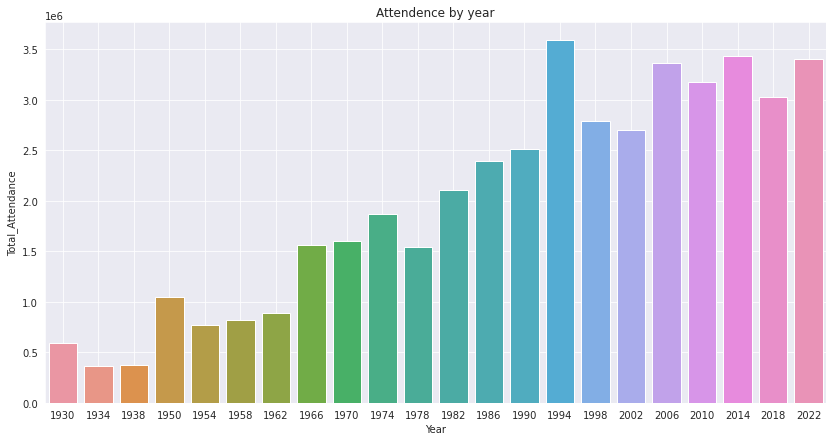

In [10]:
#df.isnull().sum()
sns.set_style("darkgrid")

att = df.groupby("Year")["Total_Attendance"].sum().reset_index()
plt.figure(figsize=(14,7))
sns.barplot(data = df,x= 'Year',y ='Total_Attendance')
plt.grid(True)
plt.title("Attendence by year")
plt.show()


<h3>Average Attendance</h3>

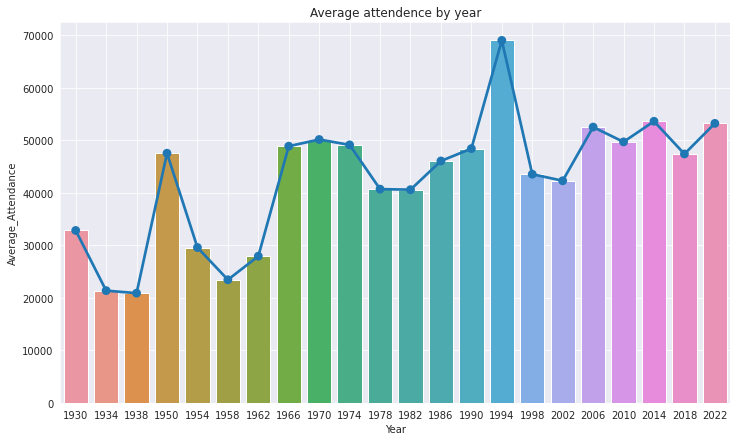

In [11]:
sns.set_style("darkgrid")

avg_att = df.groupby("Year")["Average_Attendance"].mean().reset_index()
plt.figure(figsize=(12,7))
#ax = sns.pointplot(avg_att["Year"],avg_att["Attendance"],color="w")
sns.barplot(avg_att["Year"],avg_att["Average_Attendance"])
sns.pointplot(avg_att["Year"],avg_att["Average_Attendance"])
plt.grid(True)
plt.title("Average attendence by year")
plt.show()


<h3>Audience In Each Country</h3>

Text(0, 0.5, 'Country Names ')

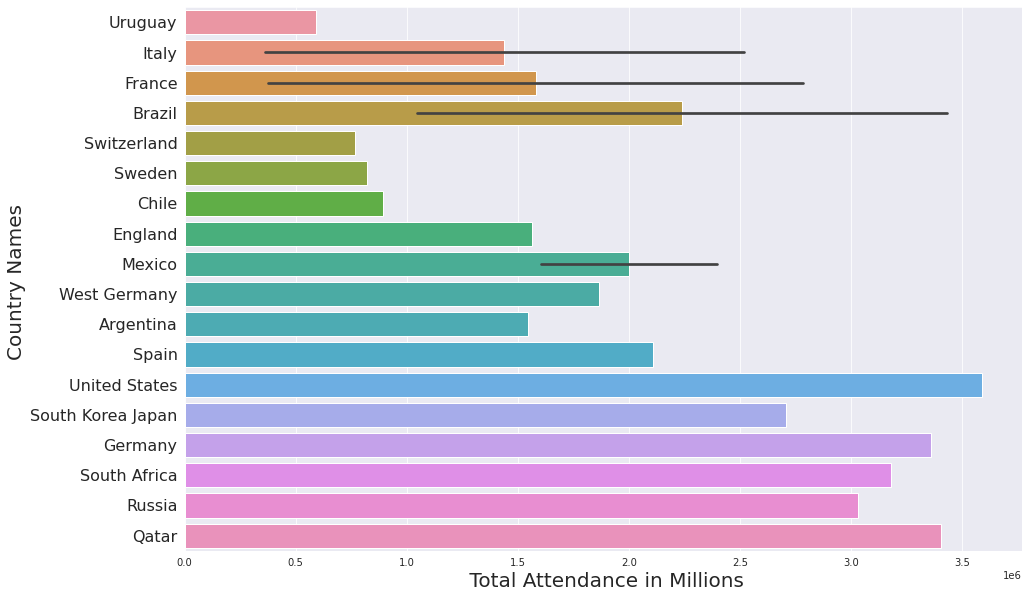

In [12]:
#Audience in Each Country
def human_format(num):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    # add more suffixes if you need them
    return '%.2f%s' % (num, ['', 'K', 'M', 'G', 'T', 'P'][magnitude])
attendanceList = [human_format(x) for x in df['Total_Attendance']]

######## Graph
a4_dims = (10, 6)
fig , ax = plt.subplots(figsize=(15,10))
sns.set(style='darkgrid')
sns.barplot(data = df,y= 'Hosts',x ='Total_Attendance')
ax.set_yticklabels(ax.get_yticklabels() , fontsize = 16)

ax.set_xlabel(' Total Attendance in Millions', fontsize = 20)
ax.set_ylabel('Country Names ', fontsize = 20)


WorldCups = pd.read_csv("/kaggle/input/world-cup-data/WorldCups.csv")
WorldCups.head()


#Total Goals By Year(***Lineplot)  load cups dataset b4hand
plt.figure(figsize=(13,7))
WorldCups["nYear"] = WorldCups["Year"].astype(str)
ax = plt.scatter("nYear","GoalsScored",data=WorldCups,
            c=WorldCups["GoalsScored"],cmap="inferno",
            s=900,alpha=.7,
            linewidth=2,edgecolor="k",)
#plt.pointplot
sns.pointplot(WorldCups["nYear"],WorldCups["GoalsScored"])

#plt.colorbar()
plt.xticks(WorldCups["nYear"].unique())
plt.yticks(np.arange(60,200,20))
plt.title('Total goals scored by year',color='b')
plt.show()


Text(0, 0.5, 'Venue Names ')

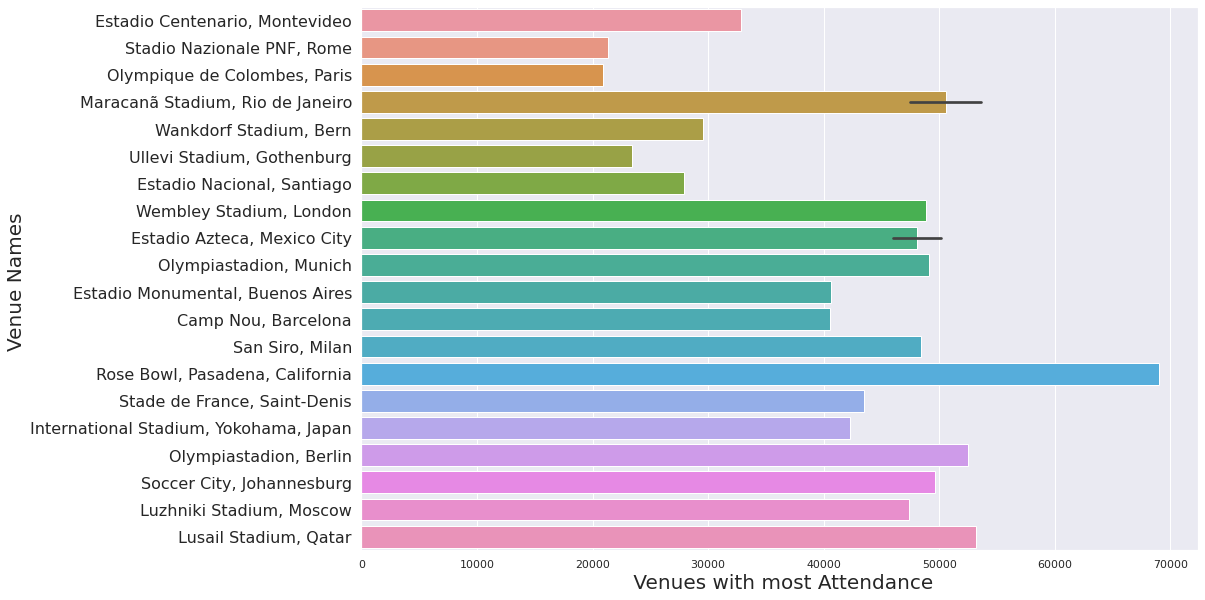

In [13]:
a4_dims = (10, 6)
fig , ax = plt.subplots(figsize=(15,10))
sns.set(style='darkgrid')
sns.barplot(data = df,y= 'Venue',x ='Average_Attendance')
ax.set_yticklabels(ax.get_yticklabels() , fontsize = 16)

ax.set_xlabel(' Venues with most Attendance', fontsize = 20)
ax.set_ylabel('Venue Names ', fontsize = 20)

Cities with Most Matches

Text(0, 0.5, 'Country Names ')

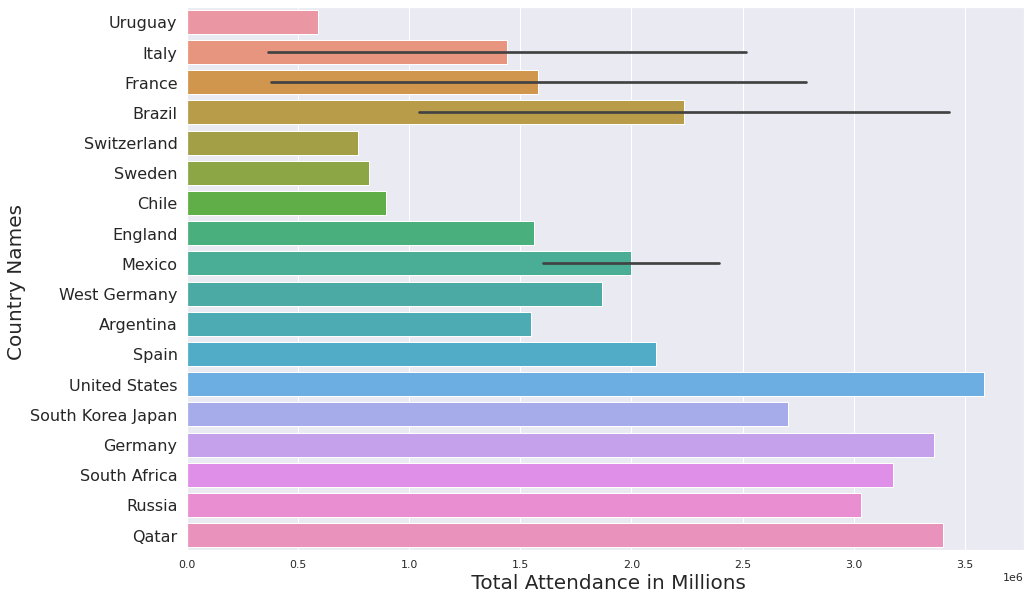

In [14]:
a4_dims = (10, 6)
fig , ax = plt.subplots(figsize=(15,10))
sns.set(style='darkgrid')
sns.barplot(data = df,y= 'Hosts',x ='Total_Attendance')
ax.set_yticklabels(ax.get_yticklabels() , fontsize = 16)

ax.set_xlabel(' Total Attendance in Millions', fontsize = 20)
ax.set_ylabel('Country Names ', fontsize = 20)

Finals

In [15]:
df2 = pd.read_csv('../input/fifa-world-cup-attendance-19302022/List of FIFA World Cup finals.csv', index_col=False)
df2.head()

,Unnamed: 0,Year,Host,Champion,Score,Runner_up,Third,Score.1,Fourth,No. _ofteams
0,0,1930,Uruguay,Uruguay,"4–2 Estadio Centenario, Montevideo",Argentina,United States,– [n 1],Yugoslavia,13
1,1,1934,Italy,Italy,"2–1 (a.e.t.) Stadio Nazionale PNF, Rome",Czechoslovakia,Germany,"3–2 Stadio Giorgio Ascarelli, Naples",Austria,16
2,2,1938,France,Italy,"4–2 Stade de Colombes, Paris",Hungary,Brazil,"4–2 Parc Lescure, Bordeaux",Sweden,15
3,3,1942,(Not held because of World War II),(Not held because of World War II),(Not held because of World War II),(Not held because of World War II),(Not held because of World War II),(Not held because of World War II),(Not held because of World War II),(Not held because of World War II)
4,4,1946,(Not held because of World War II),(Not held because of World War II),(Not held because of World War II),(Not held because of World War II),(Not held because of World War II),(Not held because of World War II),(Not held because of World War II),(Not held because of World War II)


In [16]:
df2.tail()

,Unnamed: 0,Year,Host,Champion,Score,Runner_up,Third,Score.1,Fourth,No. _ofteams
20,20,2010,South Africa,Spain,"1–0 (a.e.t.) Soccer City, Johannesburg",Netherlands,Germany,"3–2 Nelson Mandela Bay Stadium, Port Elizabeth",Uruguay,32
21,21,2014,Brazil,Germany,"1–0 (a.e.t.) Maracanã, Rio de Janeiro",Argentina,Netherlands,"3–0 Estádio Nacional, Brasília",Brazil,32
22,22,2018,Russia,France,"4–2 Luzhniki Stadium, Moscow",Croatia,Belgium,"2–0 Krestovsky Stadium, Saint Petersburg",England,32
23,23,2022,Qatar,Argentina,"3–3 (a.e.t.)(4–2 p) Lusail Stadium, Lusail",France,Croatia,"2–1 Khalifa International Stadium, Al Rayyan",Morocco,32
24,24,2026,Canada Mexico United States,NaN,NaN,NaN,NaN,NaN,NaN,48


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    25 non-null     int64 
 1   Year          25 non-null     int64 
 2   Host          25 non-null     object
 3   Champion      24 non-null     object
 4   Score         24 non-null     object
 5   Runner_up     24 non-null     object
 6   Third         24 non-null     object
 7   Score.1       24 non-null     object
 8   Fourth        24 non-null     object
 9   No. _ofteams  25 non-null     object
dtypes: int64(2), object(8)
memory usage: 2.1+ KB


In [18]:
df2.shape

(25, 10)

<h3>Champions List </h3>

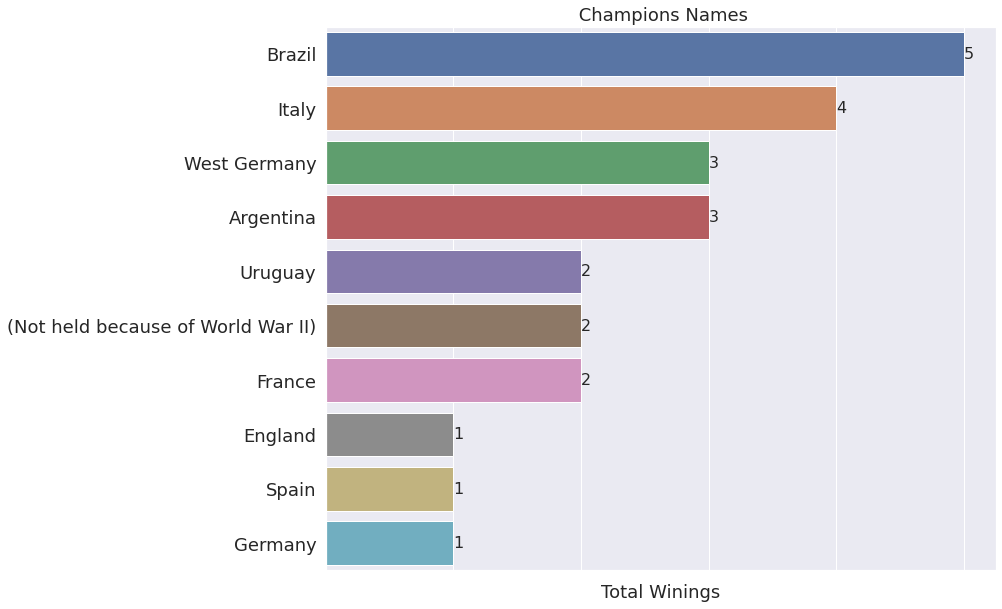

In [19]:
fig , ax = plt.subplots(figsize=(12, 10))
sns.set(style='darkgrid')

sns.countplot(data =df2,y ='Champion',order = df2['Champion'].value_counts().index)
ax.set_yticklabels( ax.get_yticklabels(), fontsize = 18)

ax.set_title(' Champions Names', fontsize = 18)
ax.set_ylabel('')

ax.set_xlabel('Total Winings', fontsize = 18)
ax.set(xticklabels=[])
for i in ax.containers:
    ax.bar_label(i,fontsize = 16)

In [20]:
winners = df2.groupby(["Champion"]).apply(lambda x : x.sort_values(by = 'Year' , ignore_index = 'True')) [['Year' , 'Runner_up']]
winners

Year                           Runner_up
Champion                                                                      
(Not held because of World War II) 0  1942  (Not held because of World War II)
                                   1  1946  (Not held because of World War II)
Argentina                          0  1978                         Netherlands
                                   1  1986                        West Germany
                                   2  2022                              France
Brazil                             0  1958                              Sweden
                                   1  1962                      Czechoslovakia
                                   2  1970                               Italy
                                   3  1994                               Italy
                                   4  2002                             Germany
England                            0  1966                        West Germany
France                             0  1998                              Brazil
                                   1  2018                             Croatia
Germany                            0  2014                           Argentina
Italy                              0  1934                      Czechoslovakia
                                   1  1938                             Hungary
                                   2  1982                        West Germany
                                   3  2006                              France
Spain                              0  2010                         Netherlands
Uruguay                            0  1930                           Argentina
                                   1  1950                              Brazil
West Germany                       0  1954                             Hungary
                                   1  1974                         Netherlands
                                   2  1990                           Argentina

<h3>Awards Dataset</h3>

In [21]:
df3 = pd.read_csv('../input/fifa-world-cup-attendance-19302022/FIFA World Cup Award.csv')
df3.head()

,Unnamed: 0,World _Cup,Golden _Ball,Golden _Boot,Goals,Golden _Glove,Clean _sheets,FIFA _Young _Player_ Award,FIFA _Fair _Play _Trophy
0,0,1930 Uruguay,Not Awarded,Guillermo Stábile,8,Not Awarded,0,Not Awarded,Not Awarded
1,1,1934 Italy,Not Awarded,Oldřich Nejedlý,5,Not Awarded,0,Not Awarded,Not Awarded
2,2,1938 France,Not Awarded,Leônidas,7,Not Awarded,0,Not Awarded,Not Awarded
3,3,1950 Brazil,Not Awarded,Ademir,8,Not Awarded,0,Not Awarded,Not Awarded
4,4,1954 Switzerland,Not Awarded,Sándor Kocsis,11,Not Awarded,0,Not Awarded,Not Awarded


In [22]:
df3.tail(15)

,Unnamed: 0,World _Cup,Golden _Ball,Golden _Boot,Goals,Golden _Glove,Clean _sheets,FIFA _Young _Player_ Award,FIFA _Fair _Play _Trophy
7,7,1966 England,Not Awarded,Eusébio,9,Not Awarded,0,Franz Beckenbauer,Not Awarded
8,8,1970 Mexico,Not Awarded,Gerd Müller,10,Not Awarded,0,Teófilo Cubillas,Peru
9,9,1974 West Germany,Not Awarded,Grzegorz Lato,7,Not Awarded,0,Władysław Żmuda,West Germany
10,10,1978 Argentina,Not Awarded,Mario Kempes,6,Not Awarded,0,Antonio Cabrini,Argentina
11,11,1982 Spain,Paolo Rossi,Paolo Rossi,6,Not Awarded,0,Manuel Amoros,Brazil
12,12,1986 Mexico,Diego Maradona,Gary Lineker,6,Not Awarded,0,Enzo Scifo,Brazil
13,13,1990 Italy,Salvatore Schillaci,Salvatore Schillaci,6,Not Awarded,0,Robert Prosinečki,England
14,14,1994 United States,Romário,Oleg Salenko Hristo Stoichkov,6,Michel Preud'homme,2,Marc Overmars,Brazil
15,15,1998 France,Ronaldo,Davor Šuker,6,Fabien Barthez,5,Michael Owen,England France
16,16,2002 South Korea/Japan,Oliver Kahn,Ronaldo,8,Oliver Kahn,5,Landon Donovan,Belgium


In [23]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  22 non-null     int64 
 1   World _Cup                  22 non-null     object
 2   Golden _Ball                22 non-null     object
 3   Golden _Boot                22 non-null     object
 4   Goals                       22 non-null     int64 
 5   Golden _Glove               22 non-null     object
 6   Clean _sheets               22 non-null     int64 
 7   FIFA _Young _Player_ Award  22 non-null     object
 8   FIFA _Fair _Play _Trophy    22 non-null     object
dtypes: int64(3), object(6)
memory usage: 1.7+ KB


In [24]:
df3.shape

(22, 9)

Text(0, 0.5, 'Golden Boot Winners ')

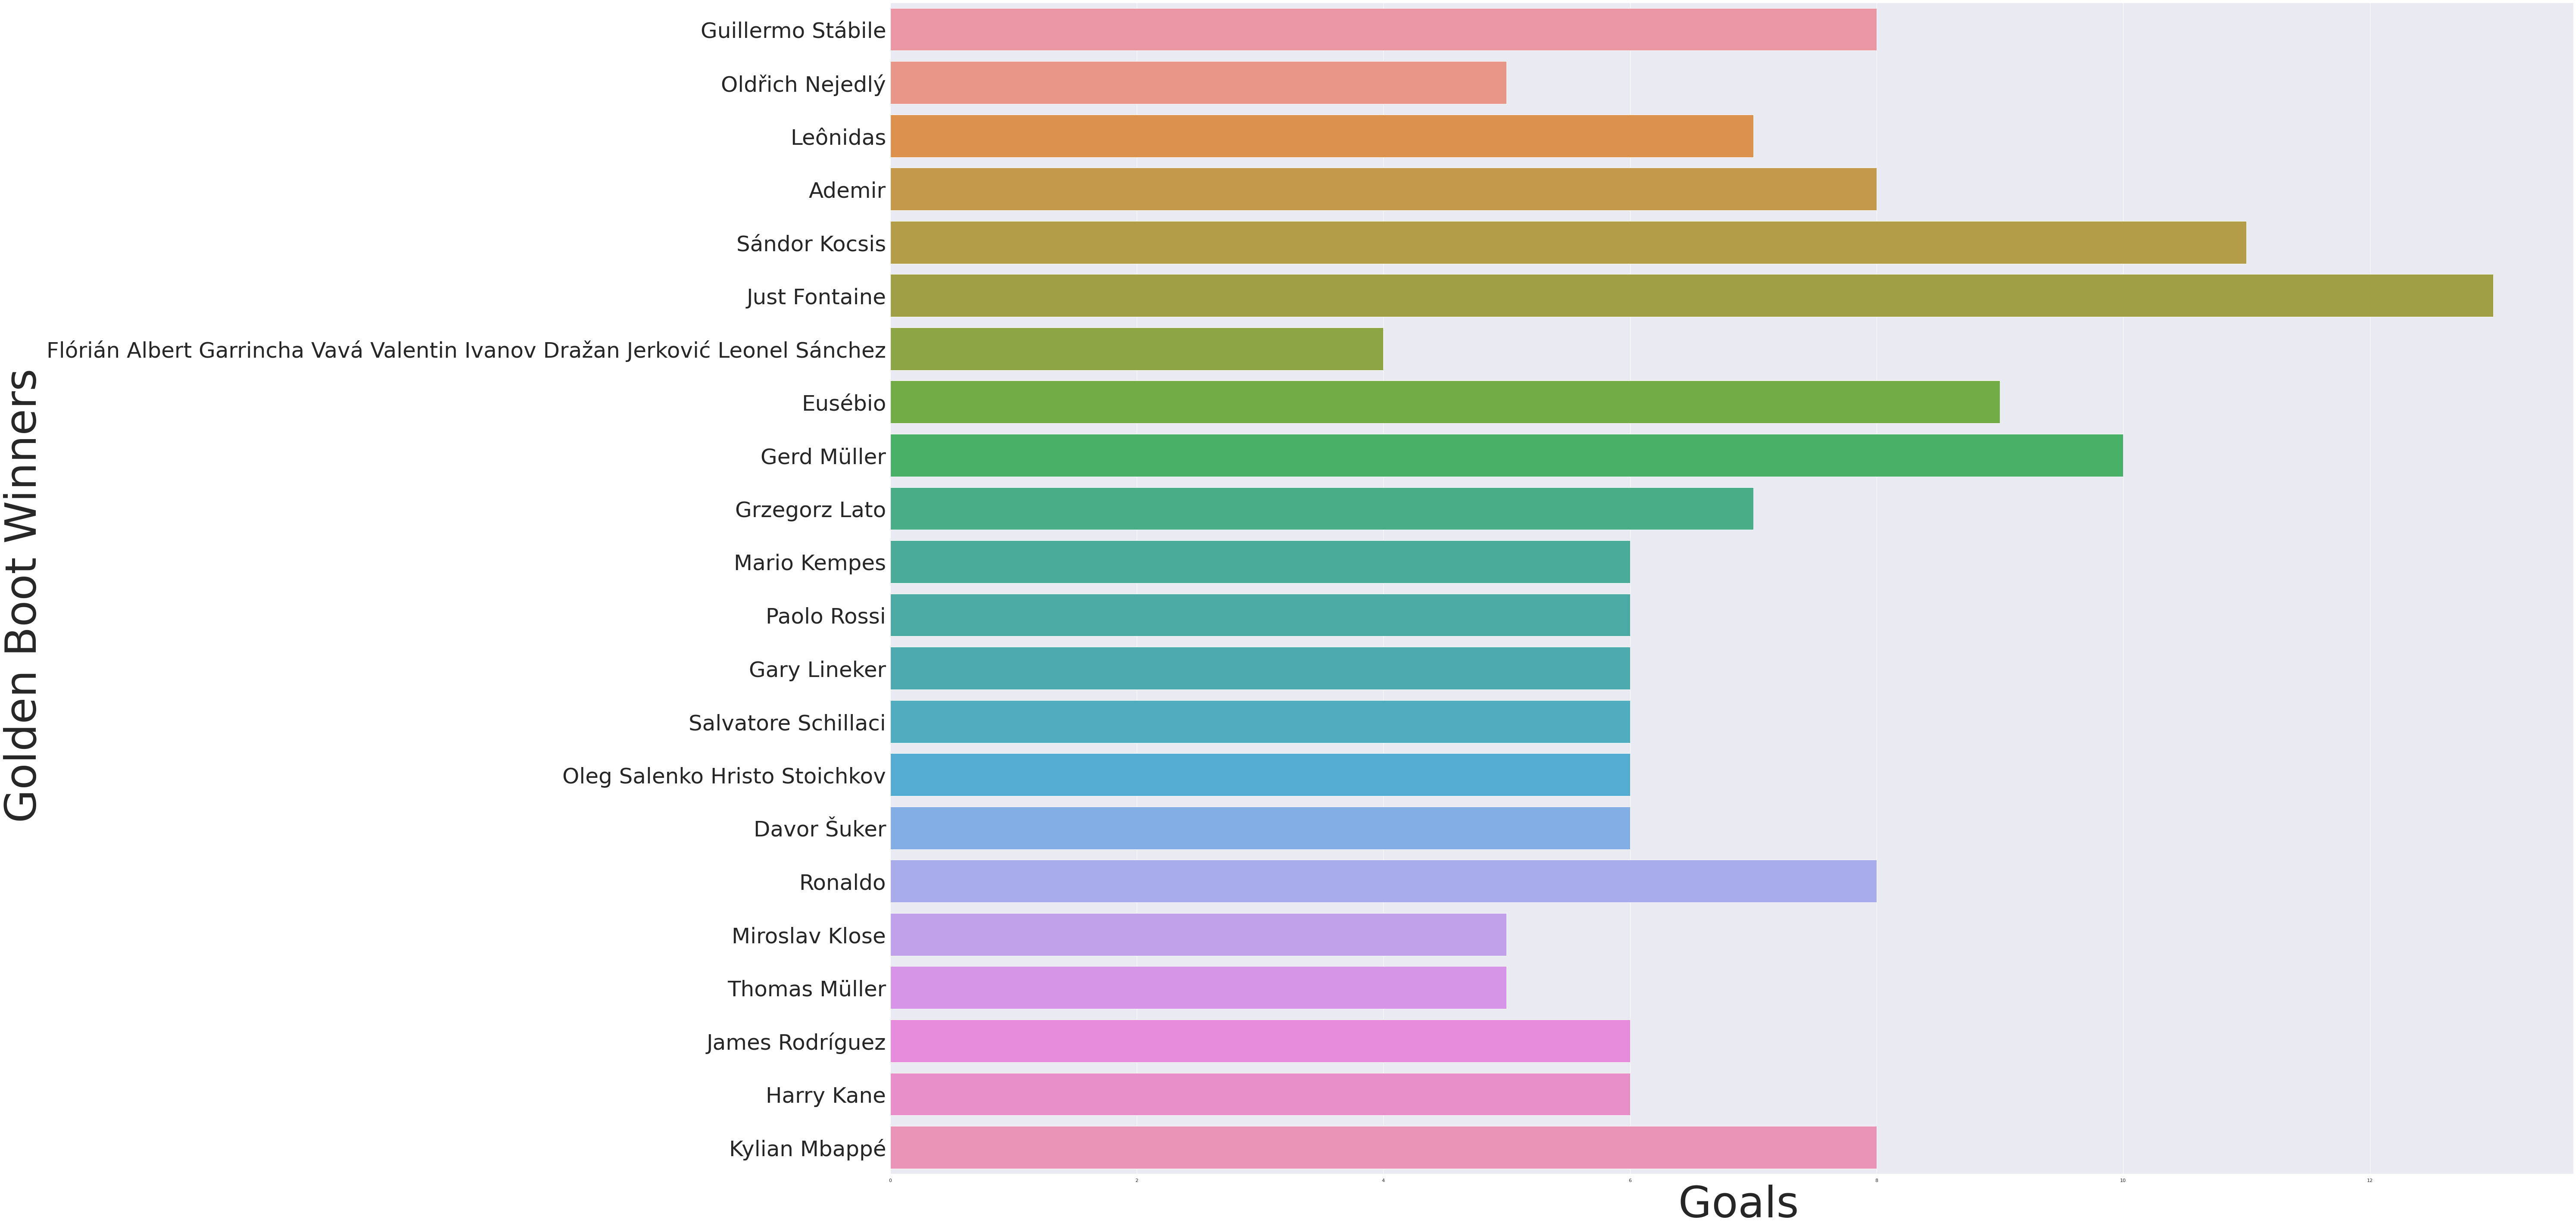

In [25]:
a4_dims = (100, 80)
fig , ax = plt.subplots(figsize=(70,50))
sns.set(style='darkgrid')
sns.barplot(data = df3,y= 'Golden _Boot',x ='Goals')
ax.set_yticklabels(ax.get_yticklabels() , fontsize = 50)

ax.set_xlabel(' Goals', fontsize = 100)
ax.set_ylabel('Golden Boot Winners ', fontsize = 100)

<h5> No Player has won the Golden boot Award twice </h5>